In [335]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [336]:
df = pd.read_csv('/Users/jonathanbeatty/Desktop/DataSets/Project_2/train.csv')

In [337]:
test_df = pd.read_csv('/Users/jonathanbeatty/Desktop/DataSets/Project_2/test.csv')

test_df.shape

(879, 80)

In [338]:
solution_df = pd.read_csv('/Users/jonathanbeatty/Desktop/DataSets/Project_2/sample_sub_reg.csv')

solution_df.shape

(879, 2)

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [340]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [341]:
df.shape

(2051, 81)

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [343]:
#Im dropping columns that have very few non null numbers in conjunction with 
#how they are usd according to the documentation for the data set
df.drop('Pool QC', axis = 1, inplace= True)
df.drop('Misc Feature', axis = 1, inplace = True)
df.drop('Fence', axis = 1, inplace = True)
df.drop('Alley', axis = 1, inplace = True)
df.drop('Lot Frontage', axis = 1, inplace = True)
df.drop('Bsmt Qual', axis = 1, inplace = True)
df.drop('Bsmt Cond', axis = 1, inplace = True)
df.drop('Bsmt Exposure', axis = 1, inplace = True)
df.drop('BsmtFin Type 1', axis = 1, inplace = True)
df.drop('BsmtFin Type 2', axis = 1, inplace = True)
df.drop('Electrical', axis = 1, inplace = True)
df.drop('Fireplace Qu', axis = 1, inplace = True)
df.drop('Garage Type', axis = 1, inplace = True)
df.drop('Garage Yr Blt', axis = 1, inplace = True)
df.drop('Garage Finish', axis = 1, inplace = True)
df.drop('Garage Qual', axis = 1, inplace = True)
df.drop('Garage Cond', axis = 1, inplace = True)
df.drop('Mas Vnr Type', axis = 1, inplace = True)
df.drop('Mas Vnr Area', axis = 1, inplace = True)

In [344]:
test_df.drop('Pool QC', axis = 1, inplace= True)
test_df.drop('Misc Feature', axis = 1, inplace = True)
test_df.drop('Fence', axis = 1, inplace = True)
test_df.drop('Alley', axis = 1, inplace = True)
test_df.drop('Lot Frontage', axis = 1, inplace = True)
test_df.drop('Bsmt Qual', axis = 1, inplace = True)
test_df.drop('Bsmt Cond', axis = 1, inplace = True)
test_df.drop('Bsmt Exposure', axis = 1, inplace = True)
test_df.drop('BsmtFin Type 1', axis = 1, inplace = True)
test_df.drop('BsmtFin Type 2', axis = 1, inplace = True)
test_df.drop('Electrical', axis = 1, inplace = True)
test_df.drop('Fireplace Qu', axis = 1, inplace = True)
test_df.drop('Garage Type', axis = 1, inplace = True)
test_df.drop('Garage Yr Blt', axis = 1, inplace = True)
test_df.drop('Garage Finish', axis = 1, inplace = True)
test_df.drop('Garage Qual', axis = 1, inplace = True)
test_df.drop('Garage Cond', axis = 1, inplace = True)
test_df.drop('Mas Vnr Type', axis = 1, inplace = True)
test_df.drop('Mas Vnr Area', axis = 1, inplace = True)

In [345]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 61 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Area           879 non-null int64
Street             879 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof Matl          879 non-null object
Exterior 1st       879 non-null object
Exteri

In [346]:
df.dropna(axis = 0, inplace = True)

In [347]:
print(df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2050
Data columns (total 62 columns):
Id                 2048 non-null int64
PID                2048 non-null int64
MS SubClass        2048 non-null int64
MS Zoning          2048 non-null object
Lot Area           2048 non-null int64
Street             2048 non-null object
Lot Shape          2048 non-null object
Land Contour       2048 non-null object
Utilities          2048 non-null object
Lot Config         2048 non-null object
Land Slope         2048 non-null object
Neighborhood       2048 non-null object
Condition 1        2048 non-null object
Condition 2        2048 non-null object
Bldg Type          2048 non-null object
House Style        2048 non-null object
Overall Qual       2048 non-null int64
Overall Cond       2048 non-null int64
Year Built         2048 non-null int64
Year Remod/Add     2048 non-null int64
Roof Style         2048 non-null object
Roof Matl          2048 non-null object
Exterior 1st       20

In [348]:
set(test_df.columns) ^ set(df.columns)

{'SalePrice'}

In [349]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Garage Cars', 'Garage Area', 'Paved Drive', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type',
       'SalePrice'],


In [350]:
test_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Garage Cars', 'Garage Area', 'Paved Drive', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type'],
      dtype='object'

In [351]:
features = ['Lot Area', 'Overall Qual',
             'Year Built', 'Year Remod/Add',
            '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Garage Cars', 'Garage Area', 
            'Total Bsmt SF', '1st Flr SF', 'TotRms AbvGrd']
X = df[features]
y = df['SalePrice']
#[col for col in df.columns if col != 'SalePrice']

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [353]:
lr = LinearRegression()
cross_val_score(lr, X, y).mean()# expected R2 score

0.7847798557007627

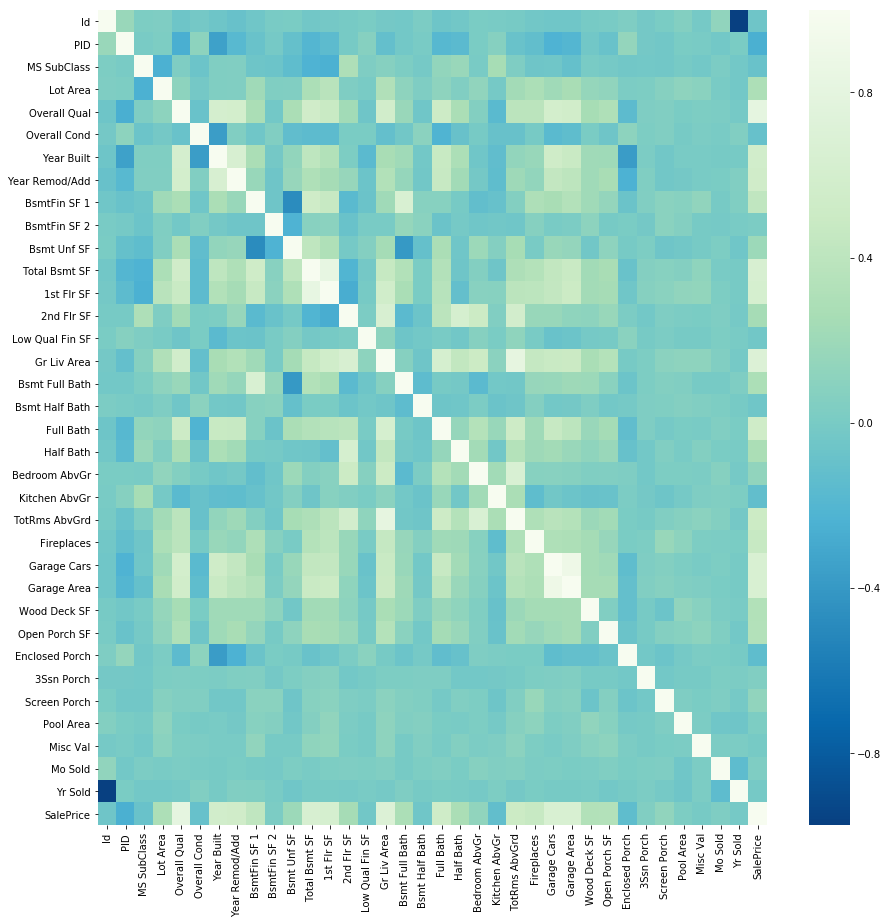

In [354]:
plt.figure(figsize =(15,15))
sns.heatmap(df.corr(), cmap="GnBu_r",)

In [355]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model=sm.OLS(y_train,X_train)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     4012.
Date:                Tue, 21 Aug 2018   Prob (F-statistic):               0.00
Time:                        10:02:06   Log-Likelihood:                -18291.
No. Observations:                1536   AIC:                         3.660e+04
Df Residuals:                    1525   BIC:                         3.666e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Lot Area           0.5617      0.164      3.

In [356]:
model=sm.OLS(y_test,X_test)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     1164.
Date:                Tue, 21 Aug 2018   Prob (F-statistic):               0.00
Time:                        10:02:06   Log-Likelihood:                -6142.8
No. Observations:                 512   AIC:                         1.231e+04
Df Residuals:                     501   BIC:                         1.235e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Lot Area           1.3992      0.252      5.

score:  0.7962392900095754


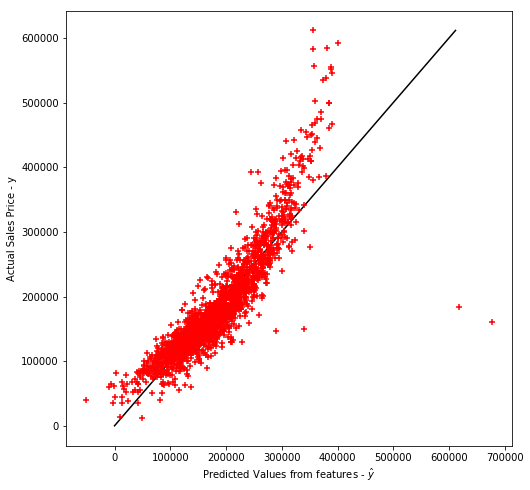

In [357]:
model = lr.fit(X, y)
predictions  =  model.predict(X)
score        =  model.score(X, y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from features - $\hat{y}$")
plt.ylabel("Actual Sales Price - y")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')


print("score: ", score)

In [358]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8032049350876691
0.7771198724267634


In [359]:
df[features]

,Lot Area,Overall Qual,Year Built,Year Remod/Add,1st Flr SF,Gr Liv Area,Full Bath,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,TotRms AbvGrd
0,13517,6,1976,2005,725,1479,2,2.0,475.0,725.0,725,6
1,11492,7,1996,1997,913,2122,2,2.0,559.0,913.0,913,8
2,7922,5,1953,2007,1057,1057,1,1.0,246.0,1057.0,1057,5
3,9802,5,2006,2007,744,1444,2,2.0,400.0,384.0,744,7
4,14235,6,1900,1993,831,1445,2,2.0,484.0,676.0,831,6
5,16492,6,1966,2002,1888,1888,2,2.0,578.0,1517.0,1888,6
6,3675,6,2005,2006,1072,1072,2,2.0,525.0,547.0,1072,5
7,12160,5,1959,1959,1188,1188,1,2.0,531.0,1188.0,1188,6
8,15783,5,1952,1952,924,924,1,1.0,420.0,924.0,924,6
9,11606,5,1969,1969,1040,2080,1,2.0,504.0,1040.0,1040,9


In [360]:

def regression_metrics(predictions, y):
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_squared_log_error
    from sklearn.metrics import median_absolute_error
    from sklearn.metrics import r2_score
    EVS = explained_variance_score(y, predictions)
    MAS = mean_absolute_error(y, predictions)
    MSE = mean_squared_error(y, predictions)
   # MSLE = mean_squared_log_error(y, predictions)
    MAE = median_absolute_error(y, predictions)
    R2 = r2_score(y, predictions)
    print(f'The Explained Variance Score is: {EVS}')
    print(f'The Mean Absolute Error is: {MAS}') 
    print(f'The Mean Squared Error is: {MSE}')
#    print(f'The Mean Squared Log Error is: {MSLE}')
    print(f'The Median Absolute Error is: {MAE}')
    print(f'The R2 score is: {R2}')
          
regression_metrics(predictions, df['SalePrice'])

The Explained Variance Score is: 0.7962392900095755
The Mean Absolute Error is: 23205.21998470718
The Mean Squared Error is: 1279063681.7257905
The Median Absolute Error is: 16916.36912211345
The R2 score is: 0.7962392900095754


In [361]:
set(test_df.columns) ^ set(df.columns)

{'SalePrice'}

In [362]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 61 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Area           879 non-null int64
Street             879 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof Matl          879 non-null object
Exterior 1st       879 non-null object
Exteri

In [363]:
# features = ['Lot Area', 'Garage Cars','Garage Area', 'Overall Qual',
#             'Year Built', 'Year Remod/Add', 'Total Bsmt SF', '1st Flr SF',
#             'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd']
# X = test_df[features]


In [364]:
features = ['Lot Area', 'Overall Qual',
             'Year Built', 'Year Remod/Add',
            '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Garage Cars', 'Garage Area', 
            'Total Bsmt SF', '1st Flr SF', 'TotRms AbvGrd']
X = test_df[features]

In [365]:
df_train = df[features]

In [366]:
df_train.head()

,Lot Area,Overall Qual,Year Built,Year Remod/Add,1st Flr SF,Gr Liv Area,Full Bath,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,TotRms AbvGrd
0,13517,6,1976,2005,725,1479,2,2.0,475.0,725.0,725,6
1,11492,7,1996,1997,913,2122,2,2.0,559.0,913.0,913,8
2,7922,5,1953,2007,1057,1057,1,1.0,246.0,1057.0,1057,5
3,9802,5,2006,2007,744,1444,2,2.0,400.0,384.0,744,7
4,14235,6,1900,1993,831,1445,2,2.0,484.0,676.0,831,6


In [367]:
model = lr.fit(df_train, y)

In [368]:
predictions = lr.predict(X)

In [369]:

ridge_model = lr.fit(X_test, y_test)
predictions  =  model.predict(X_test)
score        =  model.score(X_test, y_test)
score

0.7853298951221

In [370]:
predictions.shape

(512,)

In [371]:
test_df['Id']

0      2658
1      2718
2      2414
3      1989
4       625
5       333
6      1327
7       858
8        95
9      1568
10     2482
11     1364
12     2584
13      818
14     2673
15     2089
16     1297
17      790
18     2616
19      720
20      222
21      557
22     1148
23     2766
24      534
25     1452
26      630
27     2648
28      125
29     1904
       ... 
849     933
850    2784
851     972
852     599
853    2614
854    2582
855    1409
856     175
857     352
858     976
859    2134
860     984
861    2396
862    1673
863     404
864     607
865     814
866     868
867    2271
868    1633
869     337
870    2765
871    1746
872     368
873    2806
874    1662
875    1234
876    1373
877    1672
878    1939
Name: Id, Length: 879, dtype: int64

In [372]:
predictions.shape

(512,)

In [373]:
pred_dic = {'Id':test_df['Id'],
           'SalePrice': predictions}

preds_df = pd.DataFrame(data=pred_dic)
preds_df.info()

preds_df.shape

ValueError: array length 512 does not match index length 879

In [ ]:
preds_df[['Id', 'SalePrice']].to_csv('kaggle_preds.csv', index=False)#without this it adds unnamed:0

In [ ]:
# features = ['Lot Area', 'Overall Qual',
#              'Year Built', 'Year Remod/Add',
#             '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Garage Cars', 'Garage Area', 
#             'Total Bsmt SF', '1st Flr SF', 'TotRms AbvGrd']
# X = test_df[features]

In [ ]:
target = 'SalePrice'

In [ ]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [ ]:
ss.fit(X)# adds the means and std deviations to be able to compute with transform
X_scaled = ss.transform(X)
X_scaled

In [ ]:
predictions

In [ ]:
# pred_dic = {'Id':test_df['Id'],
#            'SalePrice': predictions}



In [ ]:
# preds_df = pd.DataFrame(data=pred_dic)
# preds_df.info()

# preds_df.shape

In [ ]:
features = ['Lot Area', 'Overall Qual',
             'Year Built', 'Year Remod/Add',
            '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Garage Cars', 'Garage Area', 
            'Total Bsmt SF', '1st Flr SF', 'TotRms AbvGrd']
X = df[features]
y = df['SalePrice']

In [ ]:
np.logspace(0,5,5)

rcv = RidgeCV(alphas = np.logspace(0, 5, 200), cv = 10)

rcv.fit(X_scaled, y)

print(rcv.alpha_)#the best penalty term we found

rcv.score(X_scaled, y)

In [ ]:
def ridge_coefs(X, y, alphas):
    
    # set up the list to hold the different sets of coefficients:
    coefs = []
    
    # Set up a ridge regression object
    ridge_reg = Ridge()
    
    # Iterate through the alphas fed into the function:
    for a in alphas:
        
        # On each alpha reset the ridge model's alpha to the current one:
        ridge_reg.set_params(alpha=a)
        
        # fit or refit the model on the provided X, Y
        ridge_reg.fit(X, y)
        
        # Get out the coefficient list
        coefs.append(ridge_reg.coef_)
        
    return coefs

In [ ]:
# np.logspace gives us points between specified orders of magnitude on a logarithmic scale. It is base 10.
r_alphas = np.logspace(0, 5, 200)

# Get the coefficients for each alpha for the Ridge, using the function above
r_coefs = ridge_coefs(X, y, r_alphas)

In [ ]:
# len(r_coefs)

In [ ]:
# model = lr.fit(X, y)

In [ ]:
np.linspace(.25,1,5)

# A:

lcv = LassoCV(alphas = np.linspace(.25,1,5), cv = 10)

lcv.fit(X_s, y)

print(lcv.alpha_)#the best penalty term we found

lcv.score(X_s, y)